In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_1 = pd.read_csv('user1_data.csv')
df_2 = pd.read_csv('user2_data.csv')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19341 entries, 0 to 19340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   19341 non-null  object 
 1   pm1     19341 non-null  float64
 2   pm2     19341 non-null  float64
 3   pm3     19341 non-null  float64
 4   am      19341 non-null  float64
 5   sm      19341 non-null  float64
 6   st      19341 non-null  float64
 7   lum     19341 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   20166 non-null  object 
 1   pm1     20166 non-null  float64
 2   pm2     20166 non-null  float64
 3   pm3     20166 non-null  float64
 4   am      20166 non-null  float64
 5   sm      20166 non-null  float64
 6   lum     20166 non-null  float64
 7   temp    20166 non-null  float64
 8   humd    20166 non-null  float64
 9   pres    20166 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


<AxesSubplot: >

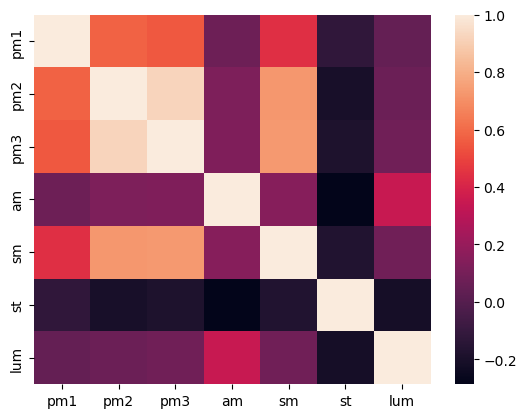

In [5]:
sns.heatmap(df_1.corr())

In [6]:
df_1.head()

ttime   pm1  pm2  pm3   am      sm     st      lum
0  2022-07-18 15:42:55  3.63  0.0  0.0  3.2  7813.0  25.65  15001.0
1  2022-07-18 15:47:55  4.19  0.0  0.0  4.8  7692.0  25.66  13863.0
2  2022-07-18 15:52:55  4.74  0.0  0.0  4.0  7813.0  25.67  13788.0
3  2022-07-18 15:57:55  5.30  0.0  0.0  4.8  7813.0  25.68  14383.0
4  2022-07-18 16:02:55  0.55  5.3  5.3  3.2  7813.0  25.69  14621.0

In [7]:
df_1['Month']=[x.split()[0].split('-')[1] for x in df_1['ttime']]
df_2['Month']=[x.split()[0].split('-')[1] for x in df_2['ttime']]


In [345]:
## plots
# sns.scatterplot(df_2['sm'])
# sns.scatterplot(df_1['sm'])

In [349]:
# df_1.drop('ttime',axis=1,inplace=True)
df_1.columns

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [350]:
X = df_1.drop('sm',axis=1)
y = df_1["sm"]

In [351]:
# Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

## Plots
# plt.scatter(y_test,predictions)

#  Evaluation Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 1746.1936176175564
Root Mean Squared Error: 1931.6974186003265


In [354]:
## convert datetime from object to datetime type
# df_1['ttime'] = pd.to_datetime(df_1['ttime'])

# df_1 = df_1.set_index(df_1.ttime)
# df_1.drop('ttime', axis=1, inplace=True)

## create hour, day and month variables from datetime index
# df_1['hour'] = df_1.index.hour
# df_1['day'] = df_1.index.day
# df_1['month'] = df_1.index.month

In [355]:
df_1.head()

pm1  pm2  pm3   am      sm     st      lum
0  3.63  0.0  0.0  3.2  7813.0  25.65  15001.0
1  4.19  0.0  0.0  4.8  7692.0  25.66  13863.0
2  4.74  0.0  0.0  4.0  7813.0  25.67  13788.0
3  5.30  0.0  0.0  4.8  7813.0  25.68  14383.0
4  0.55  5.3  5.3  3.2  7813.0  25.69  14621.0

In [356]:
# LGBM Regressor

from lightgbm import LGBMRegressor

horizon = 25

X = df_1.drop('sm', axis=1)
y = df_1['sm']
    
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]


model = LGBMRegressor(random_state=42)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 12.180156944162222
Mean Squared Error: 15.210097486008056


In [357]:
## PLSRegression

from sklearn.cross_decomposition import PLSRegression 
model = PLSRegression(n_components=4)

horizon = 25

X = df_1.drop('sm', axis=1)
y = df_1['sm']
    
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

model.fit(X_train,y_train)
predictions=pls.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 1414.0793595542036
Mean Squared Error: 1425.5525297354152


In [7]:
# Random Forest

from sklearn.model_selection import train_test_split


X = df_1.drop(['sm','ttime'], axis=1)
y = df_1['sm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X, y)
predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Absolute Error: 376.78673228700154
Mean Squared Error: 624.4339676016548


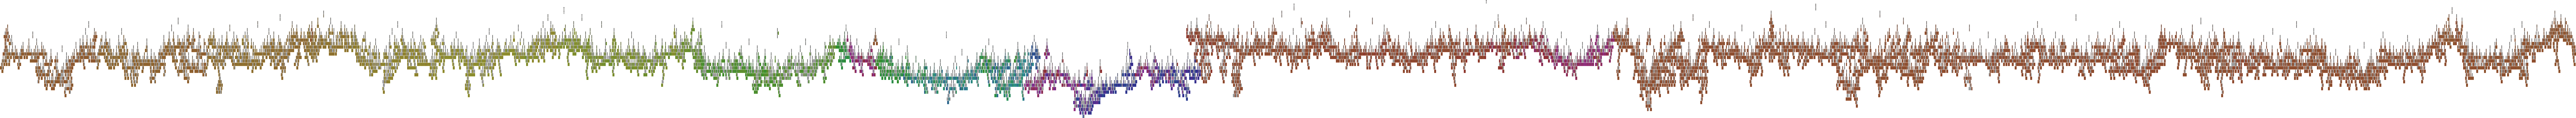

In [9]:
# from IPython.display import Image  
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from sklearn.externals.six import StringIO  
# from sklearn.tree import export_graphviz
# import pydot 

# features = list(X.columns[:])
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())  

